In [54]:
import pickle as pkl
from sklearn.model_selection import train_test_split
import numpy as np

with open(f"data_I_like/countries/large_number_of_data_points1.pickle", "rb") as f:
    loaded_data = pkl.load(f)

X, y = loaded_data['X'], loaded_data['y']
X = [[x[0], x[1]/3600] for x in X]
y = np.array([0 if _y == "America" else 1 if _y == "Japan" else 2 if _y == "India" else None for _y in np.array(y)])
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.1)

In [55]:
import numpy as np
import matplotlib.pyplot as plt



class Predictor:
    """
    I made this to translate between non-normalized queries, using a normalized model.
    """
    def __init__(self, X: list, y: list, classifier):
        X = np.array(X)
        X_normalized = self.normalize_training_data(X)
        
        self.classifier = classifier
        self.classifier.fit(X_normalized, y)
    
    def normalize_training_data(self, X):
        X = np.array(X)
        num_feature_types = X.shape[1]
        new_X = np.zeros_like(X)
        min_max_values = np.zeros((X.shape[1], 2))

        for i in range(num_feature_types):
            new_X[:, i] = (X[:, i] - np.min(X[:, i])) / (np.max(X[:, i]) - np.min(X[:, i]))
            min_max_values[i, 0] = np.min(X[:, i])
            min_max_values[i, 1] = np.max(X[:, i])
        
        self.min_max_training_values = min_max_values

        return new_X
    
    def normalize_test_data(self, X):
        X = np.array(X)
        num_feature_types = X.shape[1]
        new_X = np.zeros_like(X)

        for i in range(num_feature_types):
            new_X[:, i] = (X[:, i] - self.min_max_training_values[i, 0]) / (self.min_max_training_values[i, 1] - self.min_max_training_values[i, 0])
        
        return new_X

    def predict(self, X):
        X_normalized = self.normalize_test_data(X)
        return self.classifier.predict(X_normalized)

[1 0 0 2 0 2 2 1 2 0 0 0 2 1 0 1 1 2 1 1 0 2 0 0 1 1 0 2 1 1 1 0 1 2 1 0 0
 0 1 2 0 1 0 1 2 2 2 2 2 1 2 0 1 1 0 2 1 0 2 0 1 2 2 0 0 0 0 0 0 2 0 1 0 2
 1 1 0 0 0 1 2 1 2 2 2 2 1 1 0 0 2 2 2 0 2 1 2 2 2 2 2 2 2 0 2 2 1 0 2 1 2
 1 0 0 0 1 0 2 2 1 0 1 0 1 1 0 2 1 0 0 2 0 1 2 0 1 1 0 2 1 1 2 2 0 2 1 1 2
 0 2]


Text(0.5, 1.0, 'N = 1350 and k = 50')

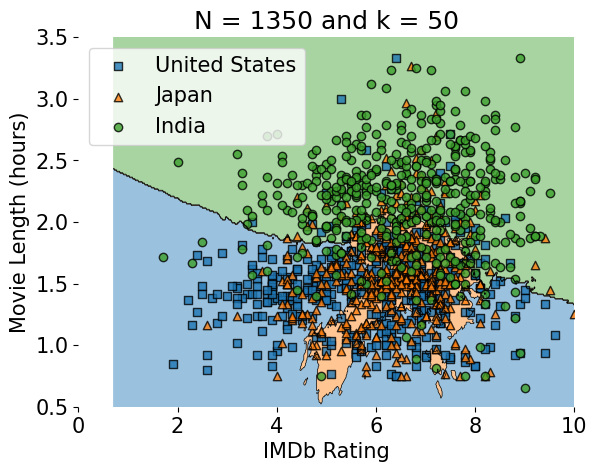

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
N = len(X_train)
# k = 1
k = 50
# k = N
predictor = Predictor(X_train, y_train, KNeighborsClassifier(n_neighbors=k))

print(predictor.predict(X_test))
plt.rcParams.update({'font.size': 15})
ax = plot_decision_regions(np.array(X_train), y_train, clf=predictor)
ax.set_xlabel("IMDb Rating")
ax.set_xlim([0, 10])
ax.set_ylabel("Movie Length (hours)")
ax.set_ylim([0.5, 3.5])
ax.legend(labels=["United States", "Japan", "India"])
ax.set_title(f"N = {N} and k = {k}")
# ax.set_title(f"k = N")


[1 0 0 2 0 2 2 1 2 0 0 0 2 1 0 1 1 2 1 1 0 2 0 0 1 1 0 2 1 1 1 0 1 2 1 0 0
 0 1 2 0 1 0 1 2 2 2 2 2 1 2 0 1 1 0 2 1 0 2 0 1 2 2 0 0 0 0 0 0 2 0 1 0 2
 1 1 0 0 0 1 2 1 2 2 2 2 1 1 0 0 2 2 2 0 2 1 2 2 2 2 2 2 2 0 2 2 1 0 2 1 2
 1 0 0 0 1 0 2 2 1 0 1 0 1 1 0 2 1 0 0 2 0 1 2 0 1 1 0 2 1 1 2 2 0 2 1 1 2
 0 2]


Text(0.5, 1.0, 'Comparison With Testing Data')

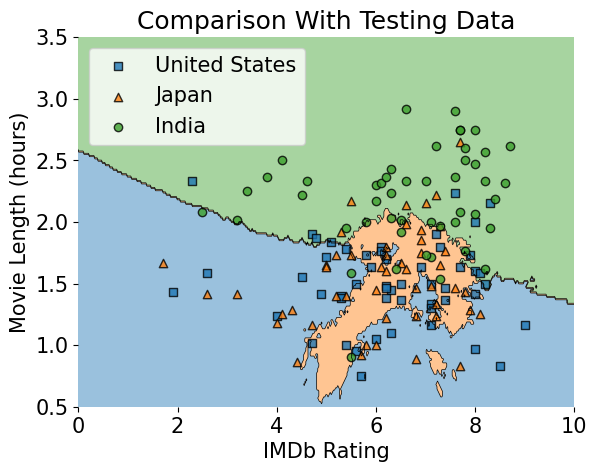

In [58]:
print(predictor.predict(X_test))
ax = plot_decision_regions(np.array(X_test), y_test, clf=predictor, zoom_factor=0.3)
ax.set_xlabel("IMDb Rating")
ax.set_xlim([0, 10])
ax.set_ylabel("Movie Length (hours)")
ax.set_ylim([0.5, 3.5])
ax.legend(labels=["United States", "Japan", "India"])
ax.set_title(f"Movie Length vs Audience Rating by Country of Origin (k = {k})")
ax.set_title(f"Comparison With Testing Data")

In [65]:
num_test_data_points = len(X_test)
num_correct = 0
num_incorrect = 0
for i in range(num_test_data_points):
    if predictor.predict([X_test[i]]) == y_test[i]:
        num_correct += 1
    else:
        num_incorrect += 1


print(num_correct / num_test_data_points)
print(num_incorrect / num_test_data_points)

0.5333333333333333
0.4666666666666667


In [33]:
print(len(X_train))
print(len(X_test))

94
11


In [ ]:
print(X_train)
print(y_train)

final_data = {
    "X": X,
    "y": y,
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test,
}

filename = "final_data2.pickle"
save = False
if save:
    with open(f"final_data_used/{filename}", "wb") as f:
        pkl.dump(final_data, f)



[[5.4, 2.25], [5.4, 1.9333333333333333], [5.2, 1.3333333333333333], [7.4, 2.3333333333333335], [6.6, 3.033333333333333], [7.1, 2.033333333333333], [7.2, 1.0], [6.5, 1.35], [6.8, 2.183333333333333], [4.6, 1.5666666666666667], [7.7, 2.283333333333333], [4.5, 1.9333333333333333], [7.1, 1.3666666666666667], [8.5, 1.6], [7.6, 2.6166666666666667], [5.1, 2.1333333333333333], [5.8, 1.4166666666666667], [6.3, 1.9166666666666667], [6.5, 1.3666666666666667], [8.4, 1.7666666666666666], [8.4, 2.35], [1.8, 1.1833333333333333], [4.6, 2.0], [6.6, 1.3], [5, 1.4666666666666666], [5.5, 1.5], [3.5, 1.35], [5.5, 1.7], [6.7, 1.5833333333333333], [6.9, 2.0], [6.7, 2.066666666666667], [6.8, 1.5], [7.3, 1.6833333333333333], [6.1, 1.45], [3.8, 1.5666666666666667], [4.7, 2.0], [8.2, 1.15], [5.4, 2.6166666666666667], [8.7, 1.0], [6.8, 1.8166666666666667], [5.7, 2.966666666666667], [8.4, 1.6666666666666667], [6, 1.75], [4.9, 1.7333333333333334], [6.1, 1.45], [7.3, 1.5], [6.6, 1.4666666666666666], [7.7, 2.516666666